<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [5]:
which = 3
out_file = 'numbers'
print( 'input data: ', out_file )
class_names = [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
channels = 1  #gray=1; rgb=3

input data:  numbers
11493376/11490434 [==============================] - 0s 0us/step


first 25 training images (as gray data)


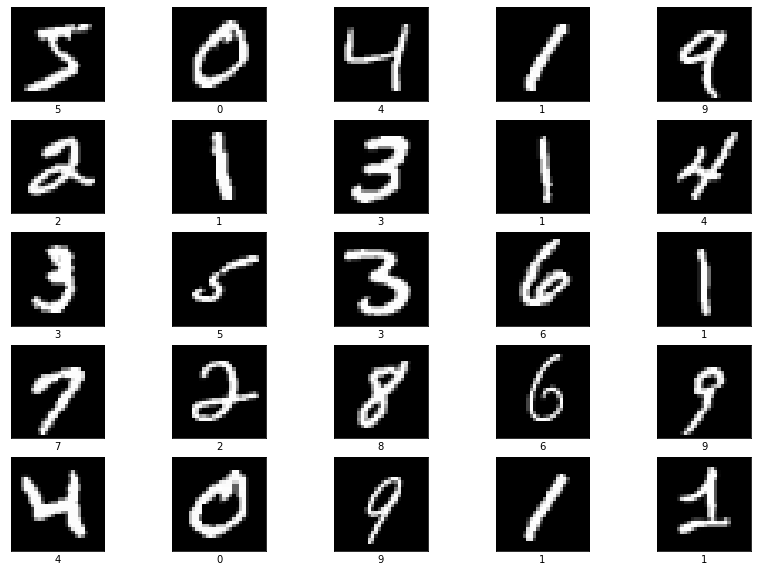

In [6]:
print( 'first 25 training images (as gray data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as gray data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()

[  0   0   0   0   0   0 164 253 253 253 253 253 253 255 253 253 253 253
 253 253  99   0   0   0   0   0   0   0]


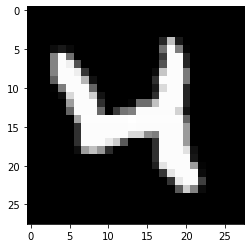

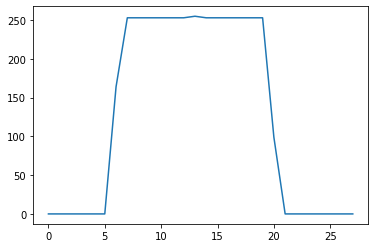

[  0   0   0   0   0   0   0   0   0   0   0   0 169 254 253 169   0   0
   0   0   0   0   0   0   0   0   0   0]


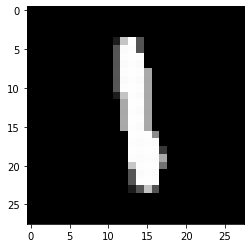

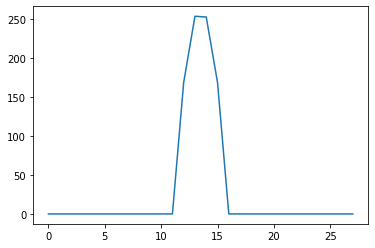

In [7]:
if channels == 1:  # 1 == gray
    i = 20  #image 20
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

    i = 200  #image 200
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

first 25 training images (as binary data)


NameError: ignored

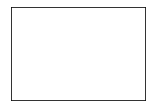

In [3]:
#show first 25 training images (as binary data)
print( 'first 25 training images (as binary data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as binary data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()


In [11]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(70000, 28, 28)
(70000,)
# of training images and their size: (56000, 28, 28)
# of training labels and their size: (56000,) 

# of testing images and their size: (14000, 28, 28)
# of testing labels and their size: (14000,)


[1363. 1603. 1368. 1417. 1440. 1283. 1422. 1395. 1328. 1381.]


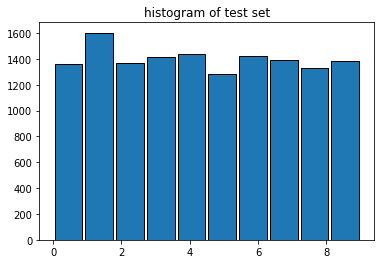

In [ ]:
plt.title( 'histogram of test set' )
out = plt.hist( test_labels, ec='black', rwidth=0.9 )
print( out[0] )


[5540 6274 5622 5724 5384 5030 5454 5898 5497 5577]


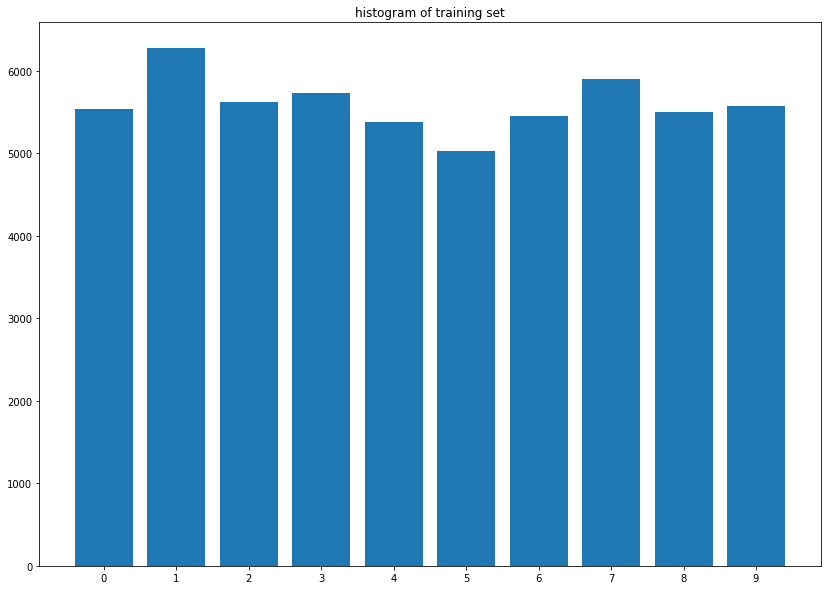

In [ ]:
h = np.histogram( train_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of training set' )
plt.bar( class_names, h )
plt.show()

[1406 1559 1385 1404 1339 1242 1392 1520 1347 1406]


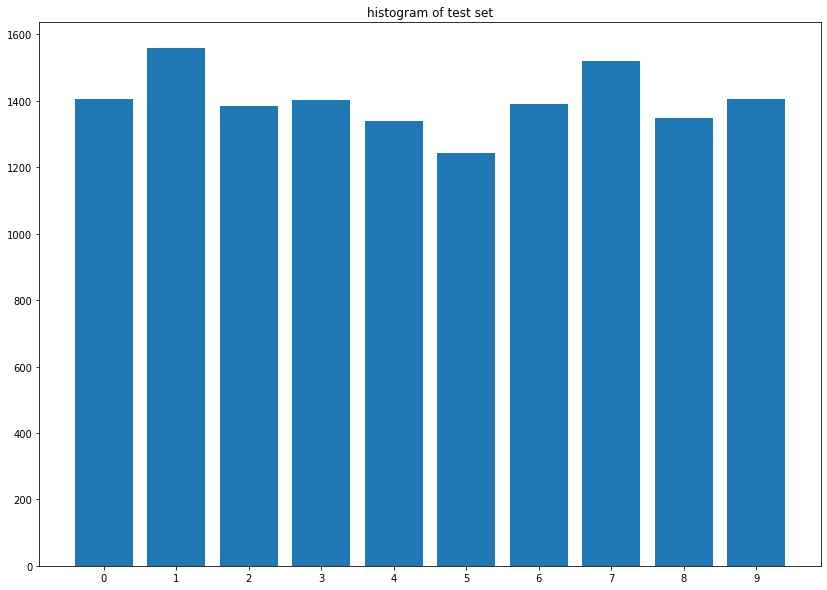

In [ ]:
h = np.histogram( test_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names, h )
plt.show()


In [13]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 28
cols = 28
channels = 1 

min = 0
max = 255


In [14]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  56000
shape before:  (56000, 28, 28)
shape after:  (56000, 28, 28, 1)
# of testing images:  14000
shape before:  (14000, 28, 28)


In [15]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

In [16]:
print( 'create new model' )
print( 'input shape: ', input_shape )
model = keras.Sequential()
model.add( keras.layers.Flatten( input_shape=input_shape ) )
model.add( keras.layers.Dense( 128,              activation='relu'    ) )
model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

create new model
input shape:  (28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


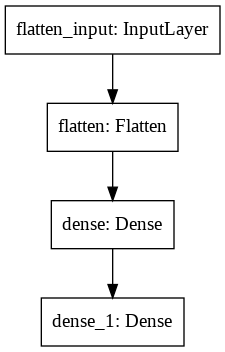

In [17]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [18]:
print( '\ntesting all test images (before any training) ...' )
test_loss, test_acc = model.evaluate( x_test, y_test )
print( "loss=" + str(test_loss) + ", test acc=" + str(test_acc) + "\n" )

# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )


testing all test images (before any training) ...
438/438 [==============================] - 4s 2ms/step - loss: 2.3848 - accuracy: 0.0951
loss=2.386140823364258, test acc=0.09428571164608002



In [19]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback] )  #randomizes by default
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9260
Epoch 2/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1127 - accuracy: 0.9673
Epoch 3/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0784 - accuracy: 0.9769
Epoch 4/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9821
Epoch 5/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9859
Epoch 6/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 7/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 8/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 9/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0173 - accuracy: 0.9951
Epoch 10/100
1750/1750 [==============================] - 

In [21]:
model.save('digits_shallow.h5')

In [ ]:
print(elapsed_training_time)

306.147620677948


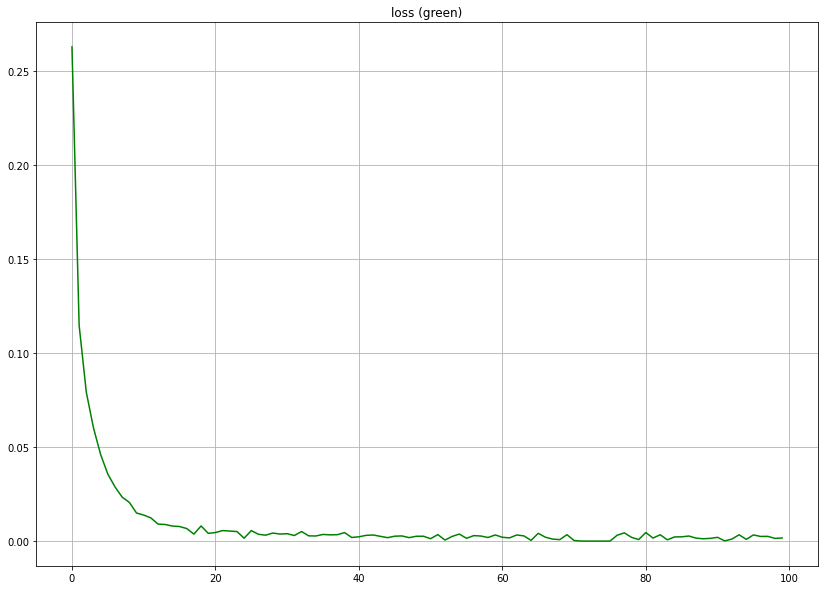

loss: [0.2626107633113861, 0.11463931947946548, 0.07911200821399689, 0.06016797199845314, 0.045966215431690216, 0.03558914363384247, 0.028796350583434105, 0.02336444891989231, 0.020576754584908485, 0.014915415085852146, 0.013841772451996803, 0.01232650876045227, 0.009039247408509254, 0.008810206316411495, 0.008000966161489487, 0.007739898283034563, 0.006663131061941385, 0.003712619189172983, 0.00804352480918169, 0.004112296737730503, 0.004550927318632603, 0.005584415514022112, 0.005336550995707512, 0.005074386019259691, 0.0015470717335119843, 0.005575465504080057, 0.0036150573287159204, 0.0031391435768455267, 0.004278539214283228, 0.0037407621275633574, 0.003931932616978884, 0.0029608584009110928, 0.005098883993923664, 0.002787297125905752, 0.0027126804925501347, 0.003527818713337183, 0.0033222294878214598, 0.0034051064867526293, 0.004514146130532026, 0.0019302101572975516, 0.002280893735587597, 0.00304698315449059, 0.0032379701733589172, 0.0025228813756257296, 0.0018162175547331572, 0

In [ ]:
#report and plot loss
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'loss (green)' );       
plt.plot( h.history['loss'],     'g' ); 
plt.show()
print( "loss:", h.history["loss"] )

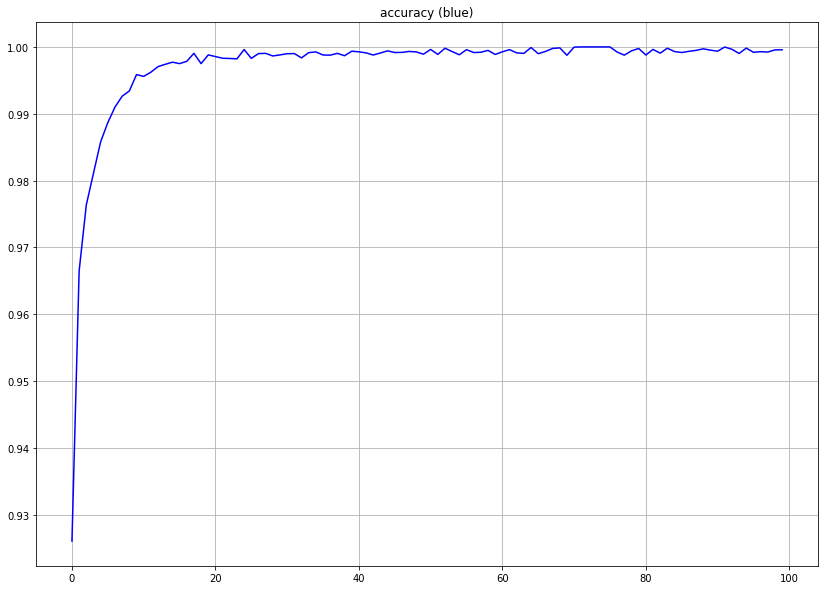

accuracy: [0.9260535836219788, 0.9664821624755859, 0.9763571619987488, 0.9811071157455444, 0.9858035445213318, 0.9886785745620728, 0.9909999966621399, 0.9926249980926514, 0.9934107065200806, 0.9958571195602417, 0.9955892562866211, 0.9962142705917358, 0.9970535635948181, 0.9973928332328796, 0.9977142810821533, 0.9975000023841858, 0.9978392720222473, 0.9990357160568237, 0.9975000023841858, 0.9988035559654236, 0.9985535740852356, 0.9983035922050476, 0.9982678294181824, 0.9982143044471741, 0.9996071457862854, 0.998285710811615, 0.9990000128746033, 0.9990357160568237, 0.9986428618431091, 0.9988035559654236, 0.9989821314811707, 0.9990000128746033, 0.9983571171760559, 0.9991428852081299, 0.9992499947547913, 0.9987857341766357, 0.9987678527832031, 0.9990357160568237, 0.9986785650253296, 0.9993571639060974, 0.9992678761482239, 0.9991071224212646, 0.9987857341766357, 0.9990893006324768, 0.9994106888771057, 0.9991607069969177, 0.9991785883903503, 0.9993214011192322, 0.9992499947547913, 0.99891072

In [ ]:
#report accuracy
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'accuracy (blue)'   );
plt.plot( h.history['accuracy'], 'b' ); 
plt.show()
print( "accuracy:", h.history["accuracy"] )

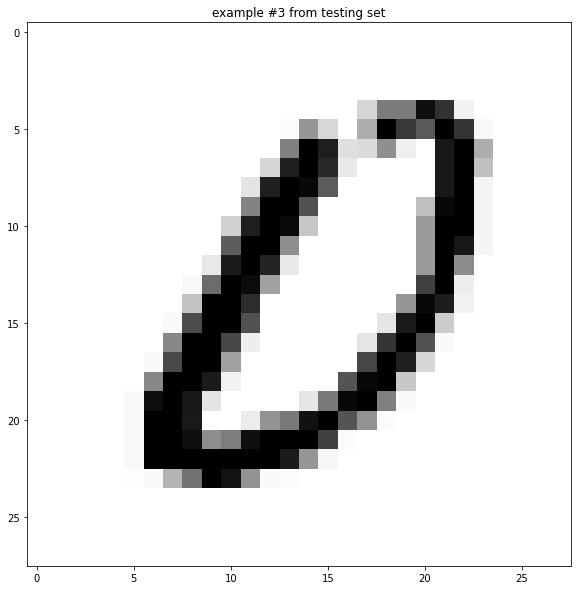

In [ ]:
# show a sample test image
plt.figure( figsize=(14,10) )
plt.title( 'example #' + str(which) + ' from testing set' )
plt.imshow( test_images[which], cmap=plt.cm.binary, interpolation='nearest' )
plt.grid( False )
plt.draw()
plt.show()

In [ ]:
#show sample prediction
print( 'actual class for test #', which, ':', test_labels[which], class_names[test_labels[which]] )
#get the image from the test dataset
img = x_test[ which ]
#add the image to a batch where it's the only member
img = ( np.expand_dims(img, 0) )
prediction = model.predict( img )
print( 'prediction vector for test image #' + str(which) + ':', prediction[0] )
print( 'subscript of maximal prediction:', np.argmax(prediction[0]), class_names[np.argmax(prediction[0])] )

actual class for test # 3 : 0 0
prediction vector for test image #3: [1.0000000e+00 0.0000000e+00 6.4995383e-22 0.0000000e+00 2.2409929e-38
 0.0000000e+00 5.4799056e-23 0.0000000e+00 8.2674178e-33 0.0000000e+00]
subscript of maximal prediction: 0 0


# First Prediction

first 120 test images (errors in parens)


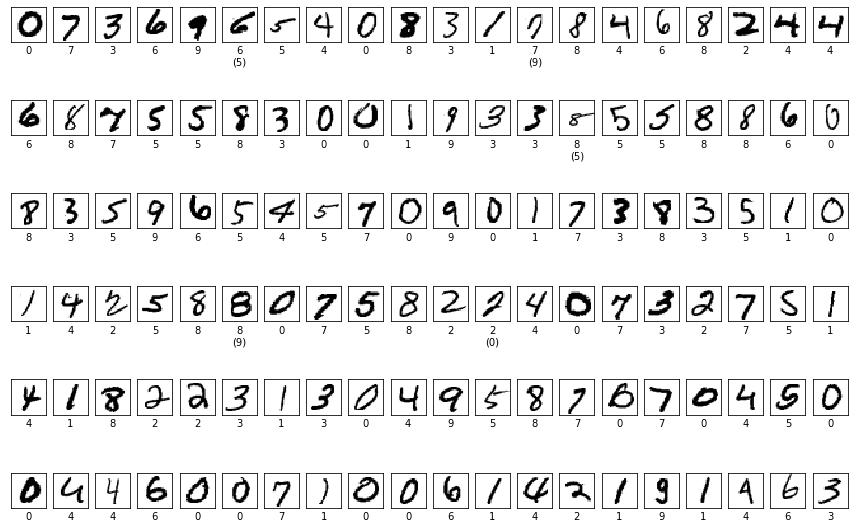

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( test_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

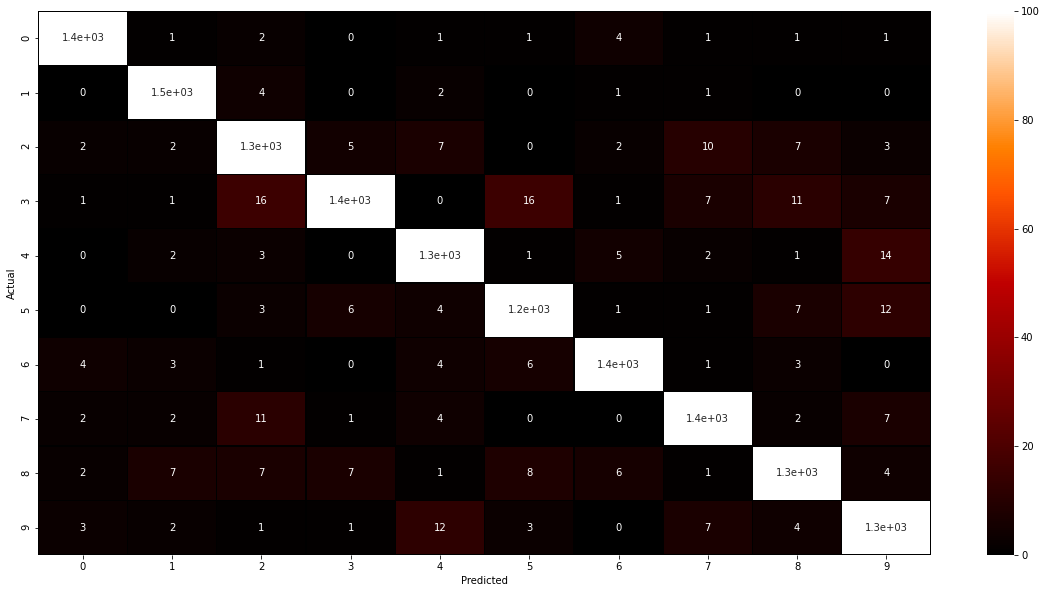

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
accuracy_scores.append({'1': accuracy_score(y_test, y_pred)})
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1393
           1       0.99      0.99      0.99      1534
           2       0.96      0.97      0.97      1360
           3       0.99      0.96      0.97      1490
           4       0.97      0.98      0.98      1346
           5       0.97      0.97      0.97      1265
           6       0.99      0.98      0.98      1398
           7       0.98      0.98      0.98      1449
           8       0.97      0.97      0.97      1390
           9       0.97      0.98      0.97      1375

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
print(len(good))
print(len(bad))

13693
307


[14 20 48 20 35 35 20 31 36 48]


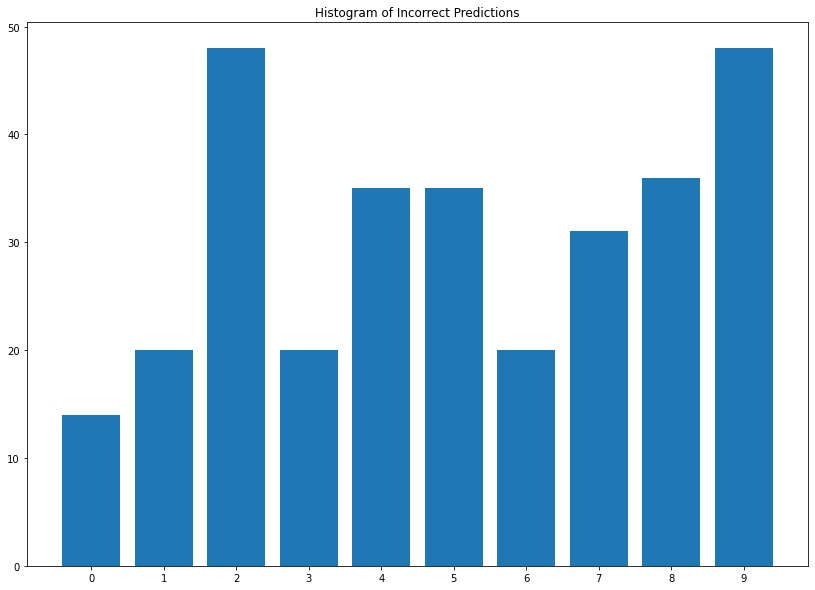

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1381 1526 1322 1430 1318 1231 1376 1420 1347 1342]


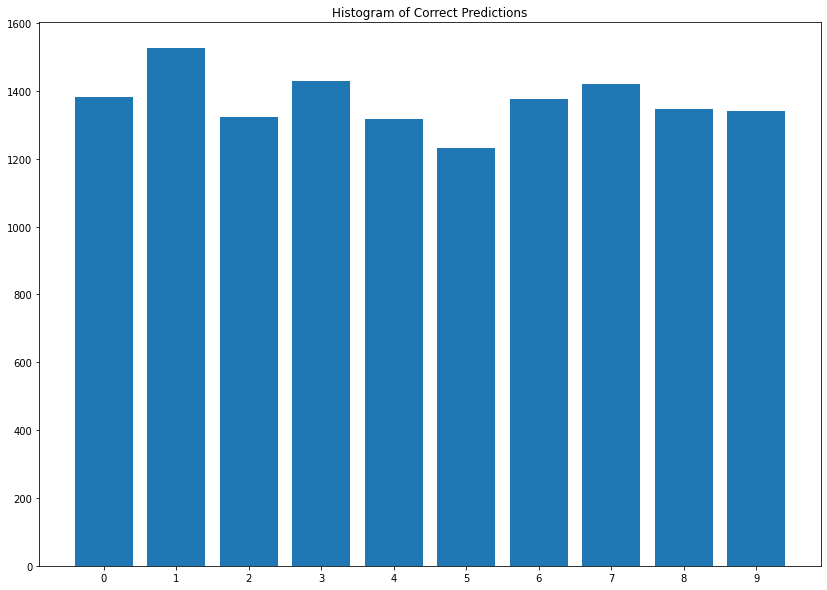

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[1.003584229390681, 1.2936610608020698, 3.5036496350364965, 1.3793103448275863, 2.5868440502586845, 2.764612954186414, 1.4326647564469914, 2.1364576154376294, 2.6030368763557483, 3.4532374100719423]


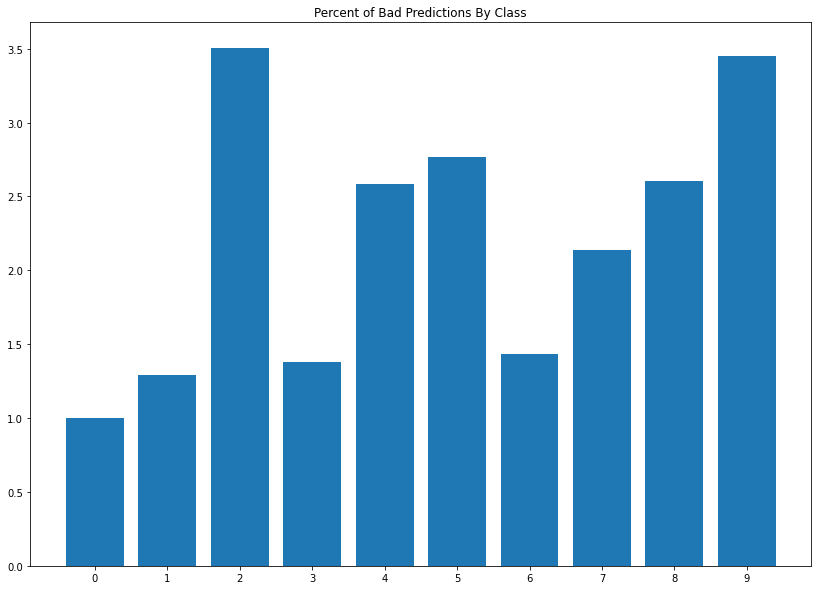

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Second Prediction - Low Noise

In [ ]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1
noise = np.random.normal(0, .1, x_test.shape)

noisy_x_test = x_test + noise
noisy_x_test = np.minimum(noisy_x_test, ones)
noisy_x_test = np.maximum(noisy_x_test, zeroes)

# Reshape and multiply by 255 to get images for display
noisy_train_images = noisy_x_test.reshape(len(x_test), img_rows, img_cols)*255

first 120 test images (errors in parens)


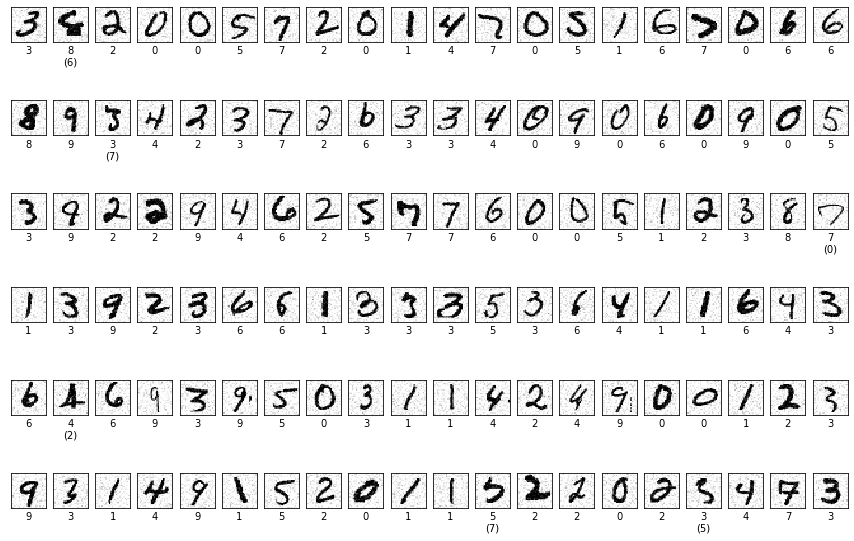

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

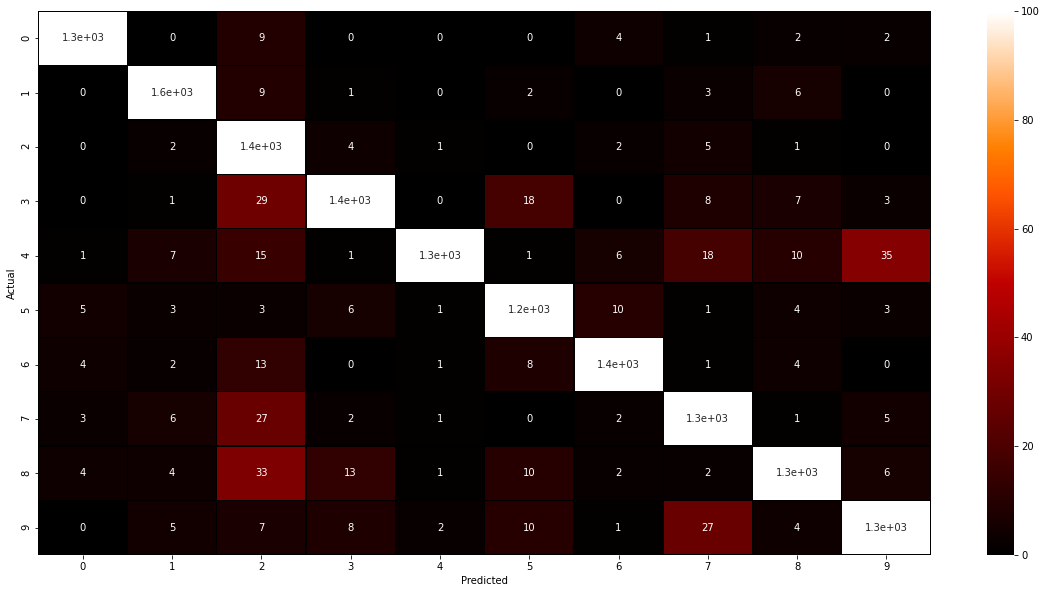

In [ ]:
y_pred = np.argmax(model.predict(noisy_x_test), axis=-1)
accuracy_scores.append({'1': accuracy_score(y_test, y_pred)})
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1363
           1       0.98      0.99      0.98      1603
           2       0.90      0.99      0.94      1368
           3       0.97      0.95      0.96      1417
           4       0.99      0.93      0.96      1440
           5       0.96      0.97      0.97      1283
           6       0.98      0.98      0.98      1422
           7       0.95      0.97      0.96      1395
           8       0.97      0.94      0.96      1328
           9       0.96      0.95      0.96      1381

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
print(len(good))
print(len(bad))

13531
469


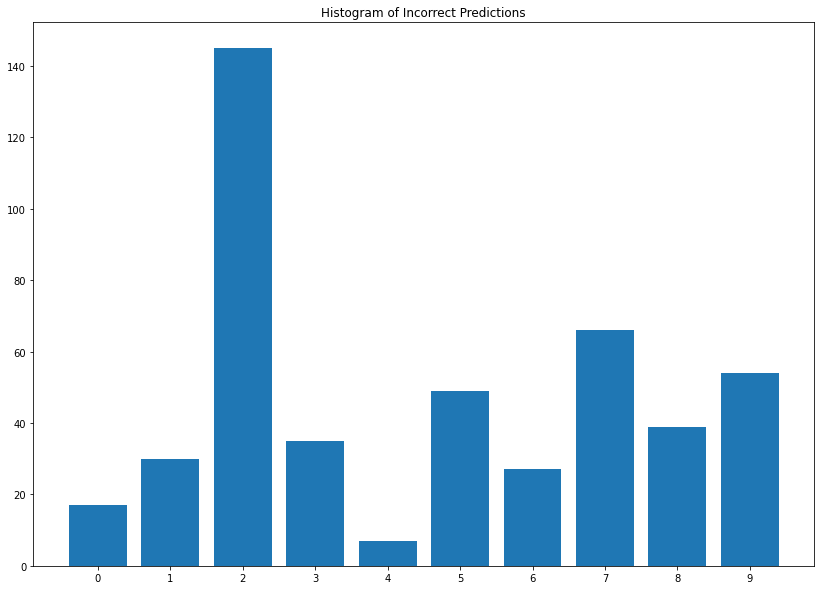

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1297 1580 1421 1419 1296 1212 1362 1439 1294 1304]


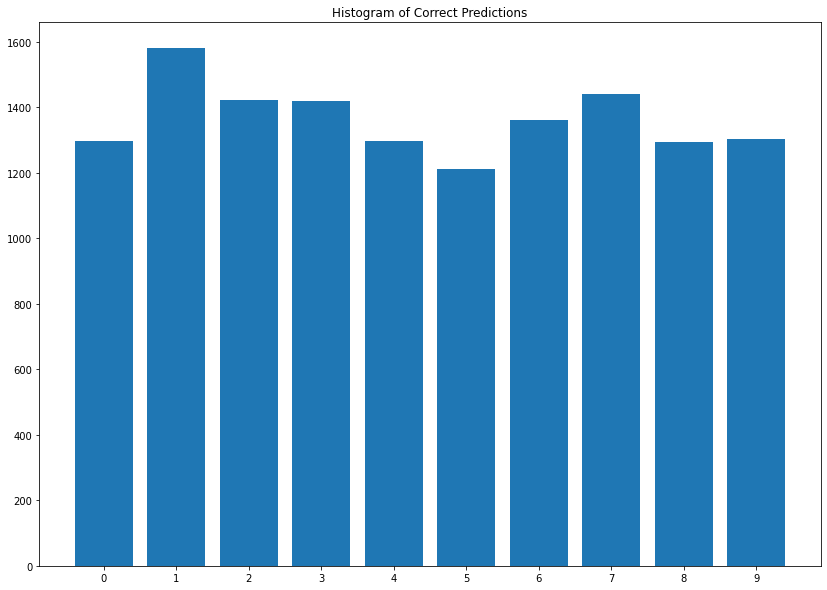

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

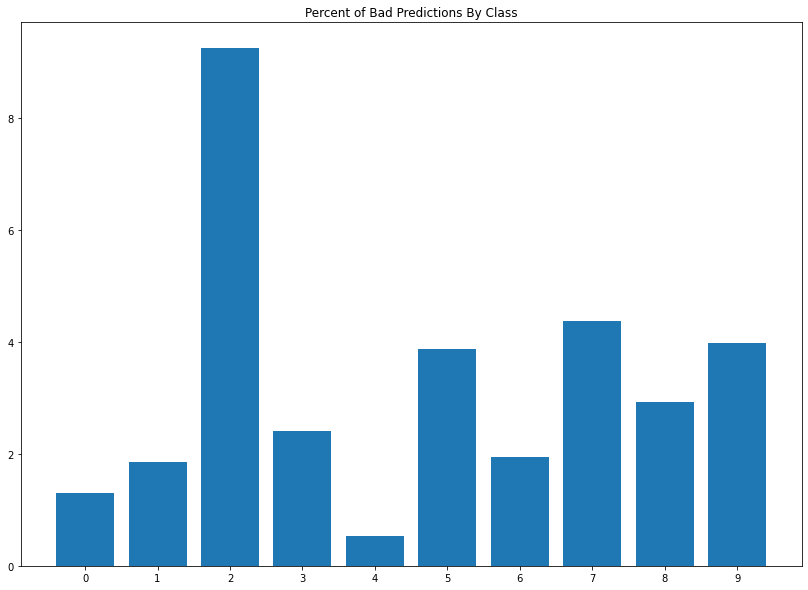

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Increase Noise

In [ ]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

noisy_test_sets.append(x_test)

noise = np.random.normal(0, .1, x_test.shape)
noisy_x_test = x_test + noise

for i in range(0, 20):

  noisy_test_sets.append(noisy_x_test)
  noise = np.random.normal(0, .1, x_test.shape)
  # Reshape and multiply by 255 to get images for display
  noisy_display_sets.append(noisy_x_test.reshape(len(x_test), img_rows, img_cols) * 255)

  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)


In [ ]:
noise_accuracy_scores = list()
noisy_predictions = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noisy_predictions.append(pred)


In [ ]:
print(noise_accuracy_scores)

[0.9789285714285715, 0.9715714285714285, 0.9442142857142857, 0.8834285714285715, 0.7954285714285714, 0.7070714285714286, 0.6275, 0.5669285714285714, 0.5137142857142857, 0.4725, 0.4387142857142857, 0.4070714285714286, 0.3805, 0.354, 0.332, 0.31007142857142855, 0.2905714285714286, 0.2734285714285714, 0.25985714285714284, 0.248, 0.23642857142857143]


first 120 test images (errors in parens)


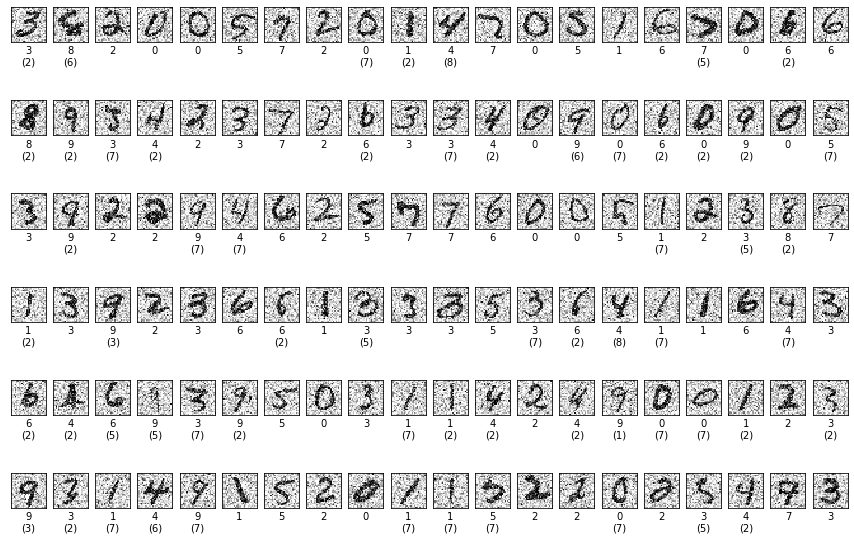

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[9][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[9][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

first 120 test images (errors in parens)


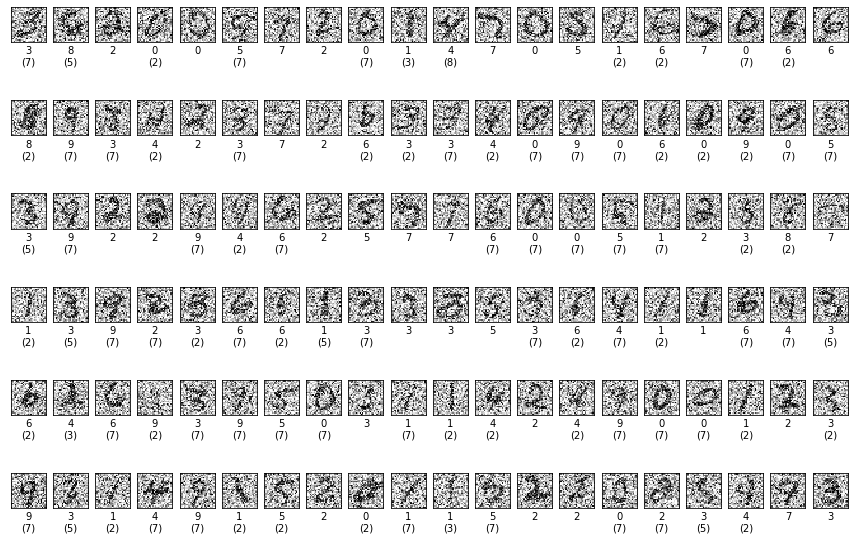

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[19][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[19][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

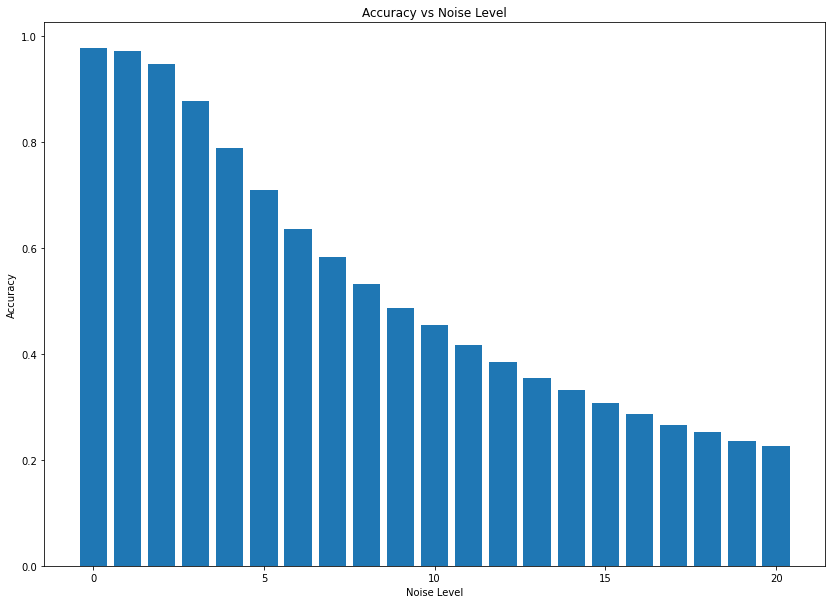

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

# Increase Depth of Neural Network

In [ ]:
deep_model = keras.Sequential()
deep_model.add( keras.layers.Flatten( input_shape=input_shape) )
deep_model.add( keras.layers.Dense( 128, activation='relu') )
deep_model.add( keras.layers.Dense( 64, activation='relu') )
deep_model.add( keras.layers.Dense( 32, activation='relu') )
deep_model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
deep_model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
ep = 100
start_2 = time()
h = deep_model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback] )  #randomizes by default
elapsed_training_time_deep = time() - start_2

Epoch 1/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.4673 - accuracy: 0.8624
Epoch 2/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1156 - accuracy: 0.9650
Epoch 3/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9771
Epoch 4/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0562 - accuracy: 0.9825
Epoch 5/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9857
Epoch 6/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9891
Epoch 7/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9900
Epoch 8/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9921
Epoch 9/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 10/100
1750/1750 [==============================] - 3s 2ms/step - l

In [ ]:
print(elapsed_training_time_deep)

375.429470539093


In [ ]:
noise_accuracy_scores_deep = list()
noisy_predictions_deep = list()

for test_set in noisy_test_sets:
  pred = np.argmax(deep_model.predict(test_set), axis=-1)
  noise_accuracy_scores_deep.append(accuracy_score(y_test, pred))
  noisy_predictions_deep.append(pred)

In [ ]:
print(noise_accuracy_scores_deep)

[0.9806428571428571, 0.9767857142857143, 0.955, 0.8968571428571429, 0.8307857142857142, 0.7677857142857143, 0.7131428571428572, 0.6628571428571428, 0.6157857142857143, 0.5742142857142857, 0.5324285714285715, 0.49814285714285716, 0.46435714285714286, 0.43264285714285716, 0.4080714285714286, 0.3877857142857143, 0.36392857142857143, 0.34564285714285714, 0.32721428571428574, 0.31064285714285716, 0.30057142857142854]


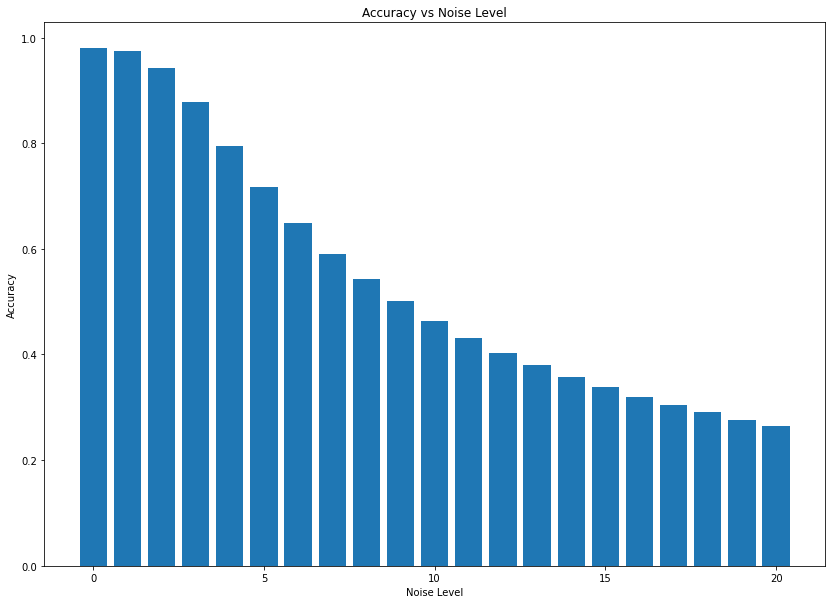

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores_deep )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

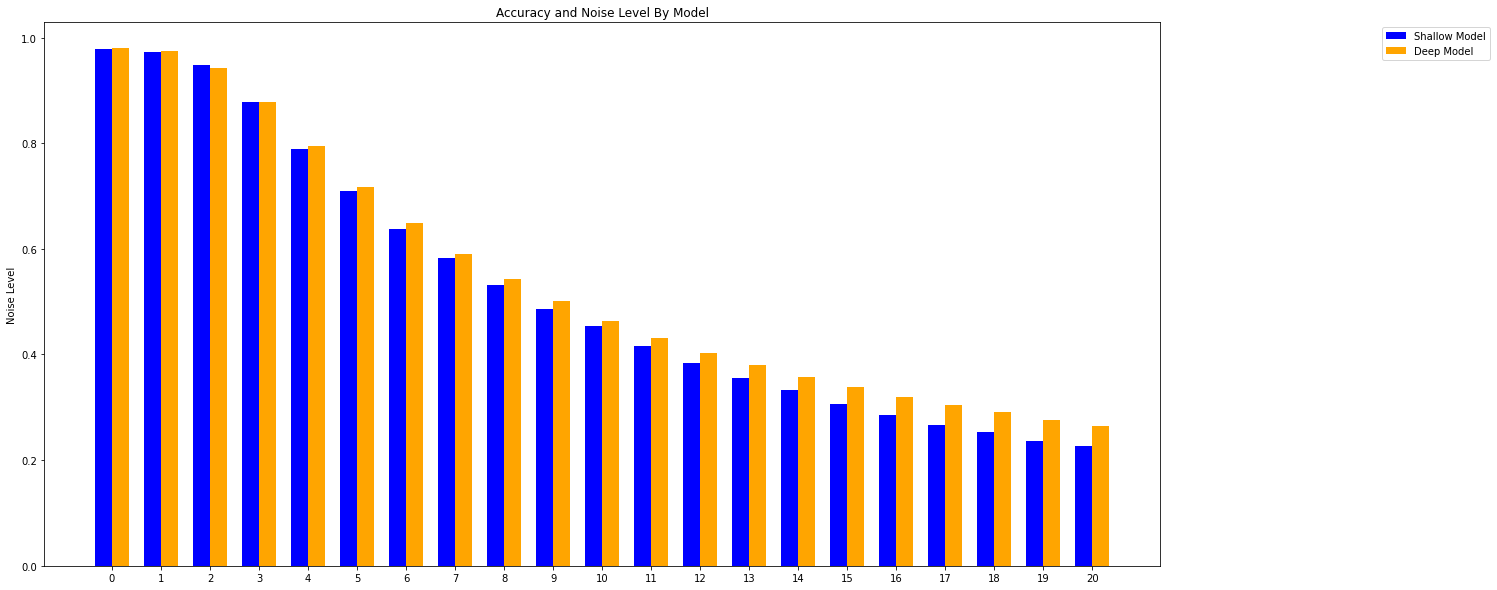

In [ ]:
labels = np.arange(0, 21)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, noise_accuracy_scores, width, label='Shallow Model', color='blue')
rects2 = ax.bar(x + width/2, noise_accuracy_scores_deep, width, label='Deep Model', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylabel('Noise Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
plt.title('Accuracy and Noise Level By Model')
plt.show()

# Convolutional Neural Net

In [ ]:
conv_model = keras.models.Sequential([
                                      keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=input_shape),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(128, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense(64, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense( len(class_names), activation='softmax' )
])
conv_model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
ep = 100
start_3 = time()
h = conv_model.fit( x_train, y_train, epochs=ep)
elapsed_training_time_conv = time() - start_3

Epoch 1/100
1750/1750 [==============================] - 43s 6ms/step - loss: 0.8626 - accuracy: 0.6980
Epoch 2/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1261 - accuracy: 0.9701
Epoch 3/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0849 - accuracy: 0.9806
Epoch 4/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0694 - accuracy: 0.9843
Epoch 5/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0565 - accuracy: 0.9869
Epoch 6/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0560 - accuracy: 0.9890
Epoch 7/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0376 - accuracy: 0.9911
Epoch 8/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0448 - accuracy: 0.9898
Epoch 9/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0428 - accuracy: 0.9900
Epoch 10/100
1750/1750 [==============================] - 10s 6m

In [ ]:
print(elapsed_training_time_conv)

1075.3105273246765


In [ ]:
noise_accuracy_scores_conv = list()
noisy_predictions_conv = list()

for test_set in noisy_test_sets:
  pred = np.argmax(conv_model.predict(test_set), axis=-1)
  noise_accuracy_scores_conv.append(accuracy_score(y_test, pred))
  noisy_predictions_conv.append(pred)

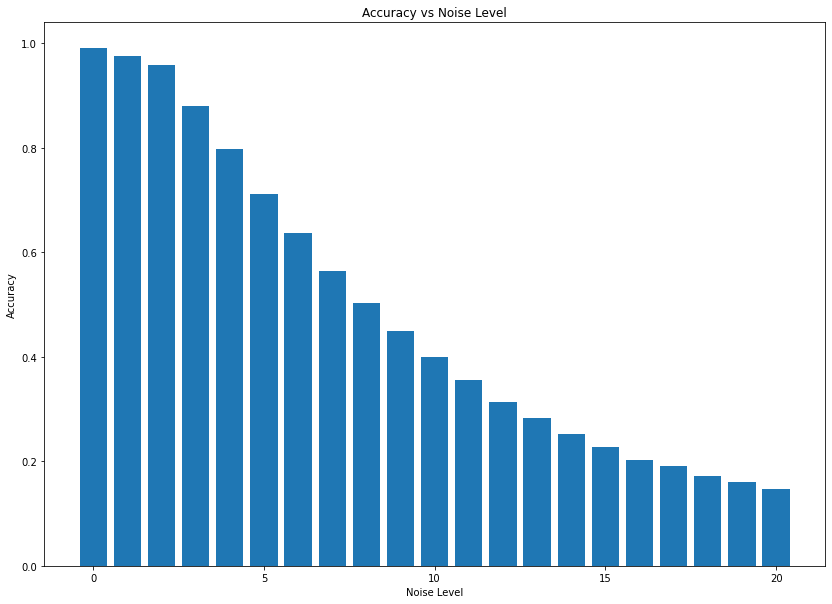

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores_conv)
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

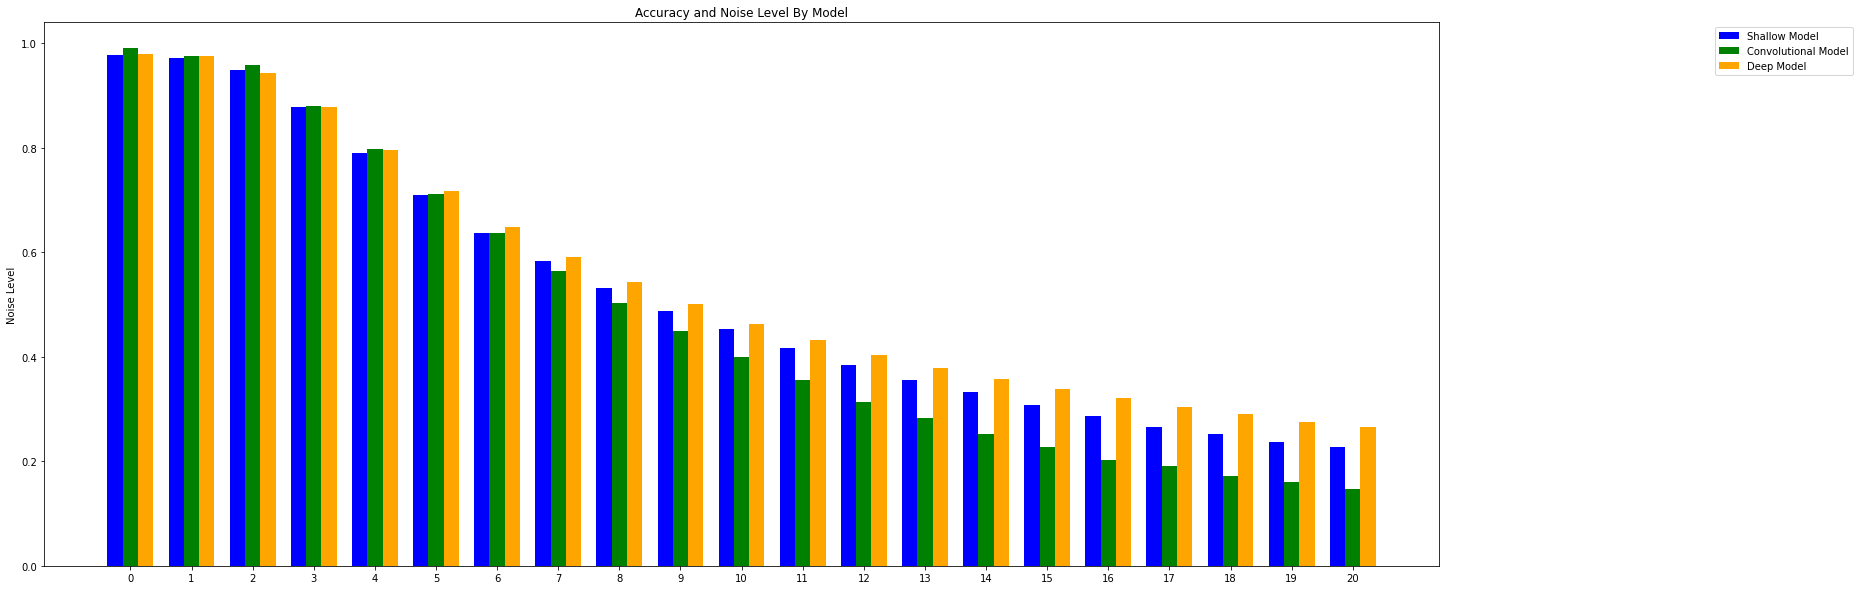

In [ ]:
labels = np.arange(0, 21)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(x - width, noise_accuracy_scores, width, label='Shallow Model', color='blue')
rects2 = ax.bar(x, noise_accuracy_scores_conv, width, label='Convolutional Model', color='green')
rects2 = ax.bar(x + width, noise_accuracy_scores_deep, width, label='Deep Model', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylabel('Noise Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
plt.title('Accuracy and Noise Level By Model')
plt.show()